In [1]:
# Losev Ivan 19 IAD
#
# Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone
# Num of Attributes: 9
# Num of Instances 4177
#
# Task: Classification
# Goal: Predict the age of abalone from physical measurements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import os

In [3]:
df  = pd.read_csv(os.getcwd() + '\\abalone.data', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Данные представлены 4177 строками, каждая из которых содержит 9 признаков:
1) Пол -  {M, F, I}, распределён равномерно
2) Физические характеристики - Length, Diameter, ... Shell weight, представленные типом float
3) Целевой параметер - Rings, который необходимо предсказазть (int)

In [4]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

После добавления пропусков нужно их устранить.
Для этого заменим пропуски средними значениями.

Кроме того уберём данные, в которых неизвестен пол.

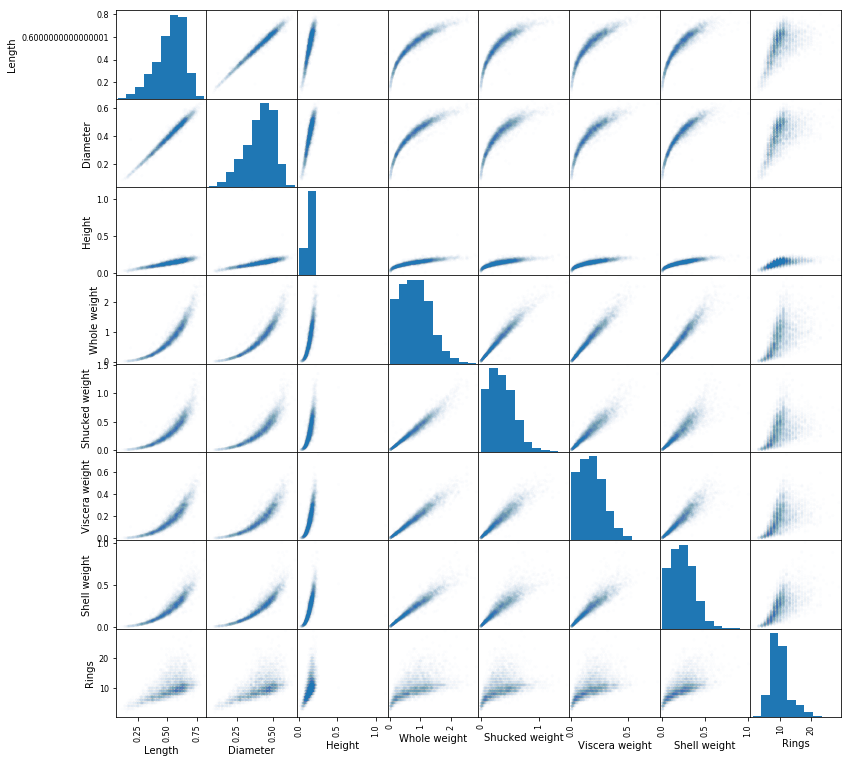

In [5]:
pd.plotting.scatter_matrix(df, alpha = .01, figsize = (13, 13))
pass

Рассматривая матрицу можно заметить, что, например, зависимость между Length и Shucked weight и Diameter и Whole weight похожа на квадратичную. Также, многие графии с Height похожи на график квадратного корня.

Кроме того, интересно количество колец. Как видно на графике, большое кол-во значений превышает значение 10.

In [6]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Глядя на таблицу можно заметить, что существует высокая корреляция между физическими параметрами (> 0,8)
При этом, корреляция между количеством колец и остальными параметрами заметно ниже (0,4-0,6)

In [7]:
for columnName in df.columns:
    if isinstance(df[columnName][0], str):
        print('{0:20}{1}'.format(columnName, ' contains string'))
    else:
        print('Mean   of {0:17} {1:.5}'.format(columnName + ':', df[columnName].mean()))
        print('Median of {0:17} {1:.5}'.format(columnName + ':', df[columnName].median()))
        print('Min    of {0:17} {1:.5}'.format(columnName + ':', df[columnName].min()))
        print('Max    of {0:17} {1:.5}'.format(columnName + ':', df[columnName].max()))
    print('{:*^40}'.format(''))

Sex                  contains string
****************************************
Mean   of Length:           0.52399
Median of Length:           0.545
Min    of Length:           0.075
Max    of Length:           0.815
****************************************
Mean   of Diameter:         0.40788
Median of Diameter:         0.425
Min    of Diameter:         0.055
Max    of Diameter:         0.65
****************************************
Mean   of Height:           0.13952
Median of Height:           0.14
Min    of Height:           0.0
Max    of Height:           1.13
****************************************
Mean   of Whole weight:     0.82874
Median of Whole weight:     0.7995
Min    of Whole weight:     0.002
Max    of Whole weight:     2.8255
****************************************
Mean   of Shucked weight:   0.35937
Median of Shucked weight:   0.336
Min    of Shucked weight:   0.001
Max    of Shucked weight:   1.488
****************************************
Mean   of Viscera weight:   0.

ValueError: Precision not allowed in integer format specifier

Можно предположить, что распределения значений признаков похоже на Гаусовское распределение, сдвинутое влево или вправо,
поскольку медиана совпадает со средним, но при этом они находятся не в середине распределение.

In [ ]:
ringNumbers = np.sort(df['Rings'].unique())
ringNumberCounts = []
ringNumberPercents = []
for ringNum in ringNumbers:
    ringNumberCounts.append(df[df['Rings'] == ringNum]['Rings'].count())
    ringNumberPercents.append(ringNumberCounts[-1] / df['Rings'].count() * 100)

fig1, plt1 = plt.subplots()
plt1.plot(ringNumbers, ringNumberCounts)
plt1.set(title='Number of Rings distribution', ylabel='Amount')
plt1.grid()


fig2, plt2 = plt.subplots()
plt2.bar(ringNumbers, ringNumberPercents)
plt2.set(title='Number of Rings distribution in %', ylabel='Percents')
plt2.grid()

a = df[(df['Rings'] >= 7) & (df['Rings'] <= 11)]['Rings'].count()
b = df['Rings'].count()
print('Num of Rings in [7-11]: ', a, '/', b, '(' + str(a / b * 100) + ' %)') 

a = df[(df['Rings'] >= 5) & (df['Rings'] < 7) | (df['Rings'] > 11) & (df['Rings'] <= 15)]['Rings'].count()
b = df['Rings'].count()
print('Num of Rings in [5-7) & (11, 15]: ', a, '/', b, '(' + str(a / b * 100) + ' %)') 

Как видно на графиках, большинство объектов исследования имеют от 7 до 11 колец (> 66%)

Также можно выделить объекты с количеством колец от 5 до 7 и от 11 до 15. Их количество составляет 25% от общего числа.

На оставшиеся 9% приходятся объекты с количеством колец меньше 5 и больше 15

In [ ]:
df.describe(include = 'all').drop(['Sex'], axis=1)

Выполним нормализацию физических параметров и заменим признак Sex на 3 бинарных (F, I, M)

In [ ]:
numerical_data = df.drop(['Sex', 'Rings'], axis=1)
numerical_data = (numerical_data - numerical_data.mean(axis = 0))/numerical_data.std(axis = 0)
                               
                               
clear_df = pd.concat([pd.get_dummies(df['Sex']), numerical_data, df['Rings']], axis=1)
clear_df.head()

In [ ]:
X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']
feature_names = X.columns

print(y.describe())

X = X.values
y = y.values


print(X.shape, type(X))
print(y.shape, type(y))
N, d = X.shape

Подготовим данные для предсказания признака Rings. Также сформирует тестовую и тренировочную выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('test error: ', test_err)

Как видно, метод ближайших соседей с n == 11 работает очень плохо.

In [ ]:
from sklearn.model_selection import GridSearchCV

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Best cv err:', best_cv_err, '\nBest parameter', best_n_neighbors)


In [ ]:

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Train error:', err_train, '\nTest  error:', err_test)


Используя GridSearch находим оптимальное значение параметра - 43.

Интересно, что в выбранном разбиении на тренировочной выборке ошибка составила 28%, а на тестовой - 26,5%

In [ ]:

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Train error:', err_train, '\nTest  error:', err_test)

Метод RandomForest так же показывает ошибку около 26%

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Попробуем теперь разделить признаки на несколько групп и повторить эксперементы

In [ ]:
original_clear_df = clear_df.copy()

clear_df.at[clear_df['Rings'] < 5, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 5)  & (clear_df['Rings'] < 10), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 10) & (clear_df['Rings'] < 15), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 15) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Как видно, выбранное разбиение только ухудшило предсказание. Попробуем разделить на группы, опираясь на распределение признака

In [ ]:
clear_df = original_clear_df.copy()

clear_df.at[clear_df['Rings'] < 7, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 7)  & (clear_df['Rings'] < 12), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 12) & (clear_df['Rings'] < 16), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 16) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Продолжив эксперементы можно подобрать оптимальную группировку колец.

Сейчас же стоит обратить внимание на то, что в дереве решение значения пола почти не влияли на результат, поэтому попробуем их убрать

In [ ]:
clear_df = original_clear_df.copy()


X = clear_df.drop(['Rings', 'I', 'M', 'F'], axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))